# Problem 1 : Analysis of Numeric Variables

Download the Kaggle dataset “train.csv” from NTU Learn, posted corresponding to this Example Class.

Extract the following Numeric variables from the dataset, and store as a new Pandas DataFrame.

`LotArea`, `GrLivArea`, `TotalBsmtSF`, `GarageArea`, `SalePrice`


In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()

### a) Check the individual statistical description and visualize the statistical distributions of each of these variables.

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


In [4]:
houseNumData.describe().round(2)

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.0
mean,10516.83,1515.46,1057.43,472.98,180921.2
std,9981.26,525.48,438.71,213.80,79442.5
min,1300.00,334.00,0.00,0.00,34900.0
25%,7553.50,1129.50,795.75,334.50,129975.0
50%,9478.50,1464.00,991.50,480.00,163000.0
75%,11601.50,1776.75,1298.25,576.00,214000.0
max,215245.00,5642.00,6110.00,1418.00,755000.0


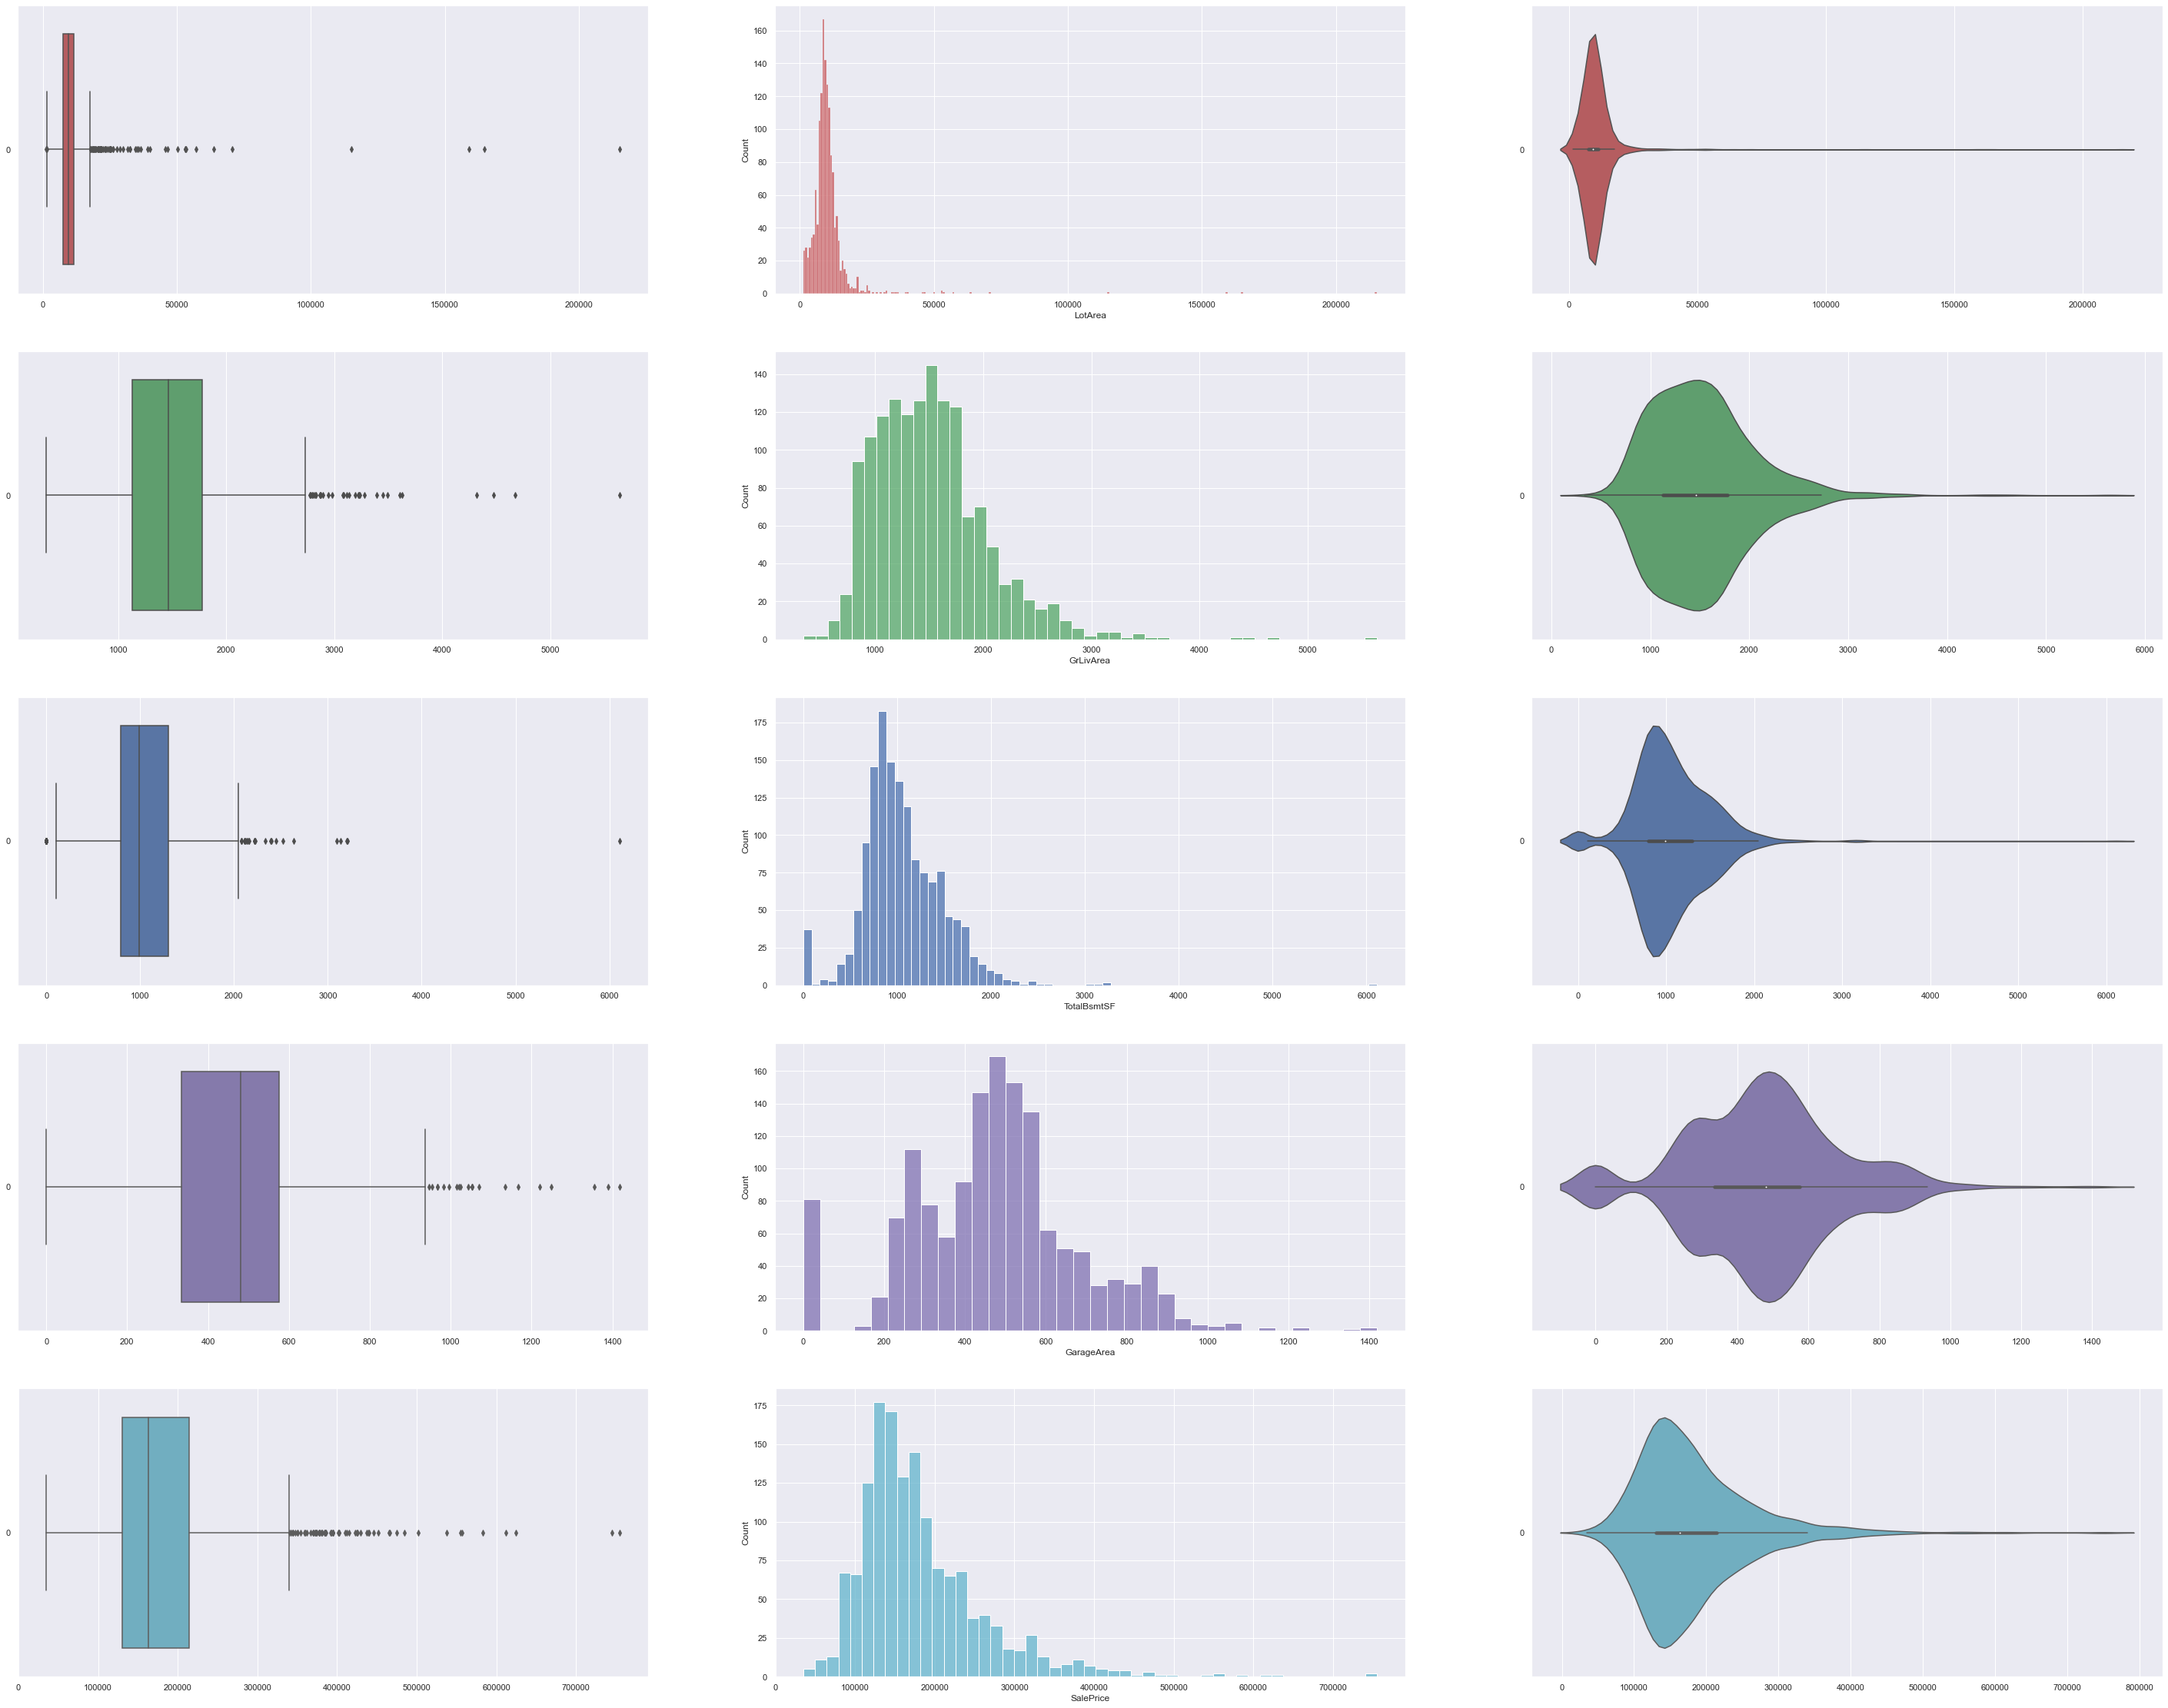

In [5]:
f, axes = plt.subplots(5, 3, figsize=(50, 40))
colors = ["r", "g", "b", "m", "c"]

count=0

for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient ="h", color = colors[count], ax = axes[count,0])
    sb.histplot(data = houseNumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

### b) Discuss with your friends if the distributions look like “Normal Distribution”. Which one has maximum outliers?

LotArea and SalePrice looks like a normal distribution. LotArea and maybe SalePrice has the most outlier

### c) Check the relationship amongst the variables using mutual correlation and the correlation heatmap. Discuss with your friends and determine which of the variables has the strongest correlation with “SalePrice”. Is it useful?

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

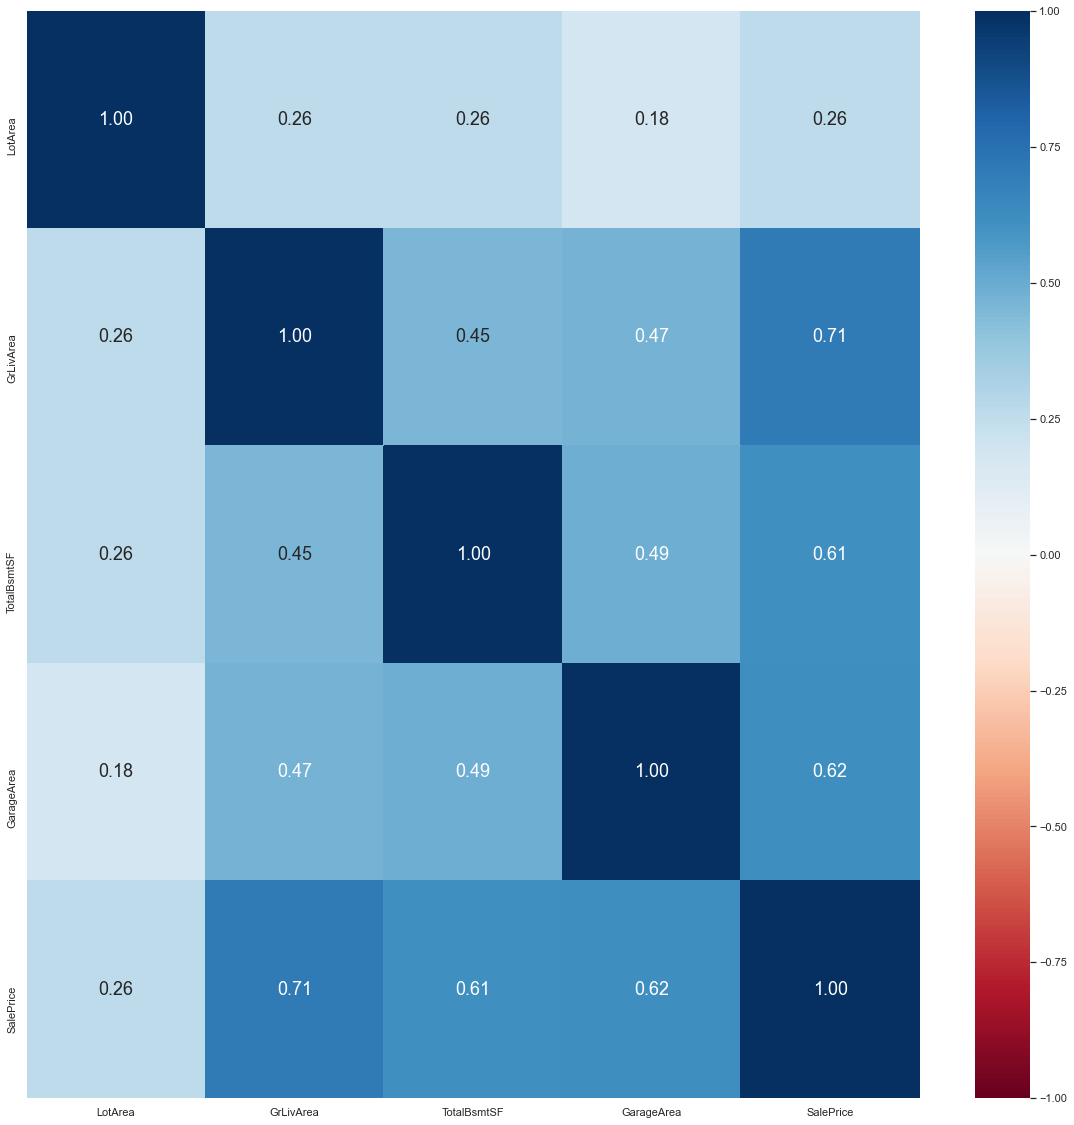

In [6]:
print(houseNumData.corr())

f = plt.figure(figsize=(20,20))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f', annot_kws = {"size": 18}, cmap = "RdBu")

##### Ans: GrLivArea has the strongest correlation with "SalePrice"

### d) Check the relationship amongst the variables using mutual jointplots and an overall pairplot. Discuss with your friends and determine which of the variables has the strongest linear relation with “SalePrice”. Is it useful?

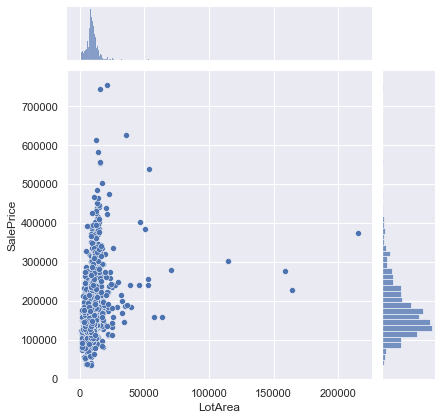

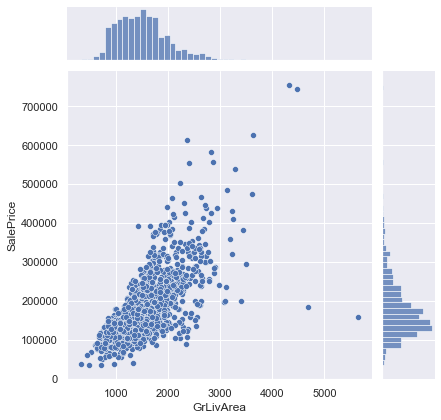

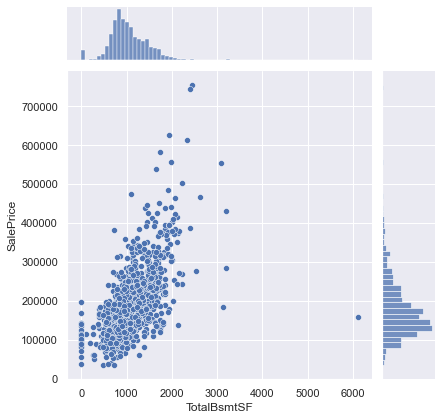

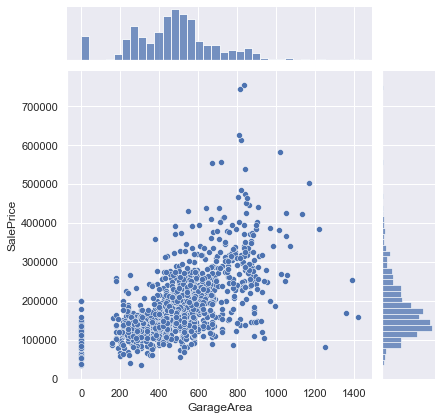

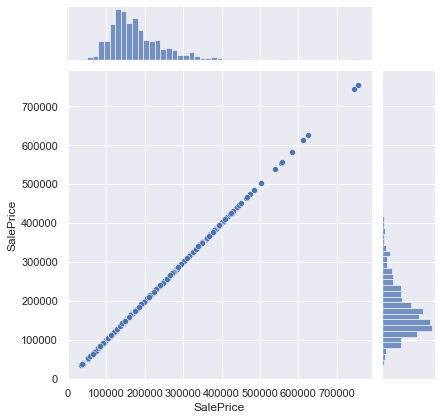

In [7]:
for var in houseNumData:
    sb.jointplot(x=houseNumData[var], y=houseNumData['SalePrice'])

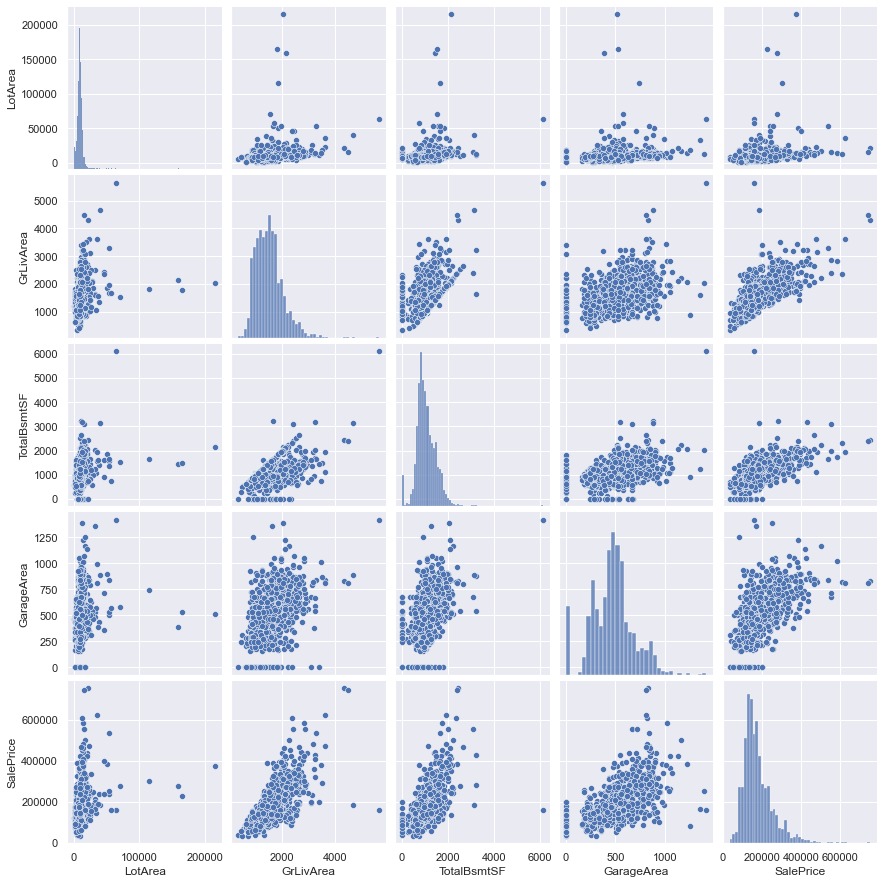

In [17]:
#Draw pair of variables against one another
sb.pairplot(data = houseNumData)

# Problem 2 : Statistical Summary
Extract the following Categorical variables from the dataset, and store as a new Pandas DataFrame.

houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

In [9]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


### a) Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).

In [10]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


In [11]:
for var in houseCatData:
    houseCatData[var] = houseCatData[var].astype('category')
    
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 7.8 KB


### b) Check the individual statistical description and visualize the distributions (catplot) of each of these variables.

In [22]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


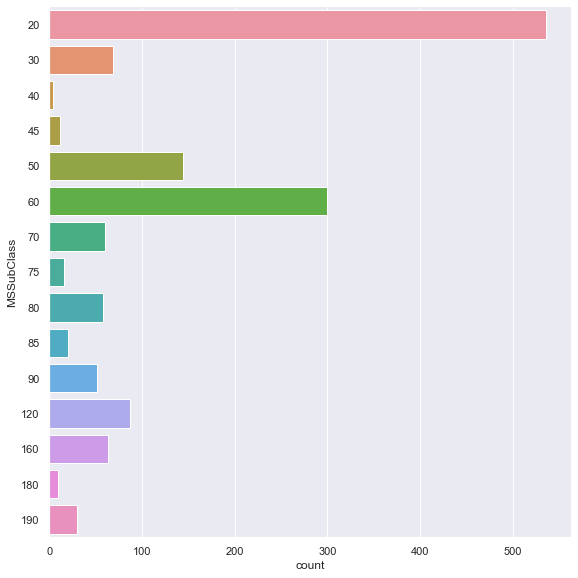

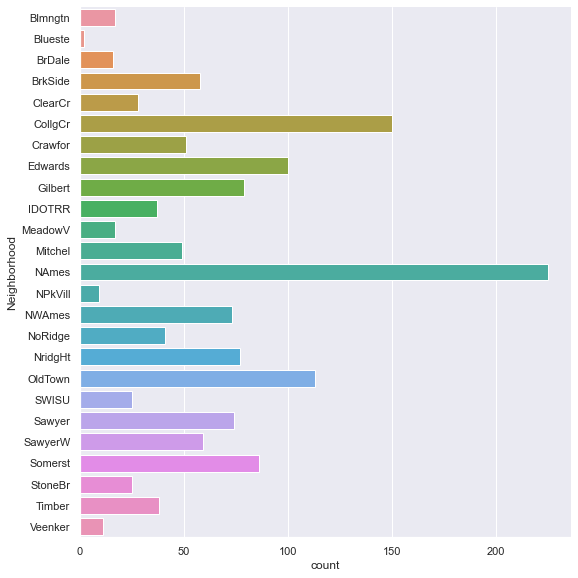

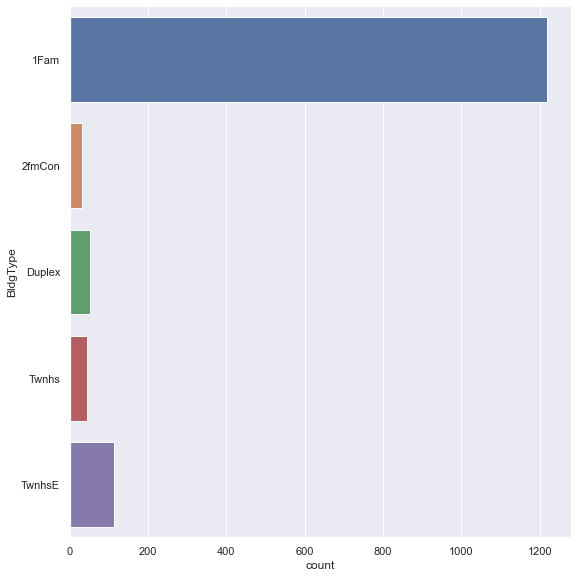

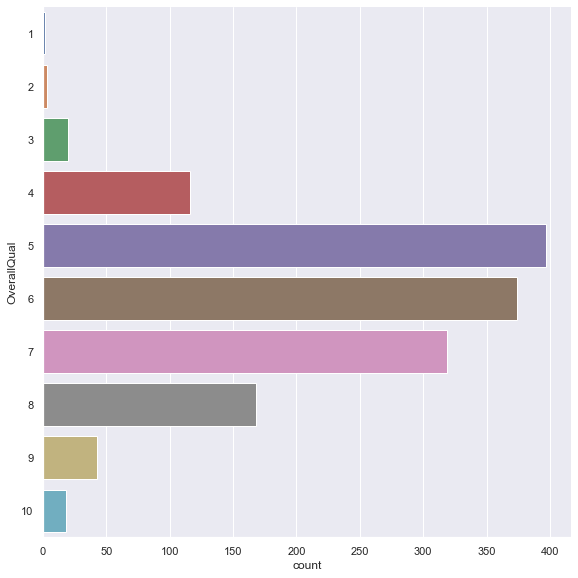

In [13]:
sb.catplot(y = "MSSubClass", data = houseCatData, kind = "count", height = 8)
sb.catplot(y = "Neighborhood", data = houseCatData, kind = "count", height = 8)
sb.catplot(y = "BldgType", data = houseCatData, kind = "count", height = 8)
sb.catplot(y = "OverallQual", data = houseCatData, kind = "count", height = 8)

### c) Check the relationship amongst the variables using bi-variate heatmap of counts. Discuss with your friends and see if you can figure any intuitive relationship of “OverallQual” with the other three variables? Is this useful?

<AxesSubplot:xlabel='BldgType', ylabel='OverallQual'>

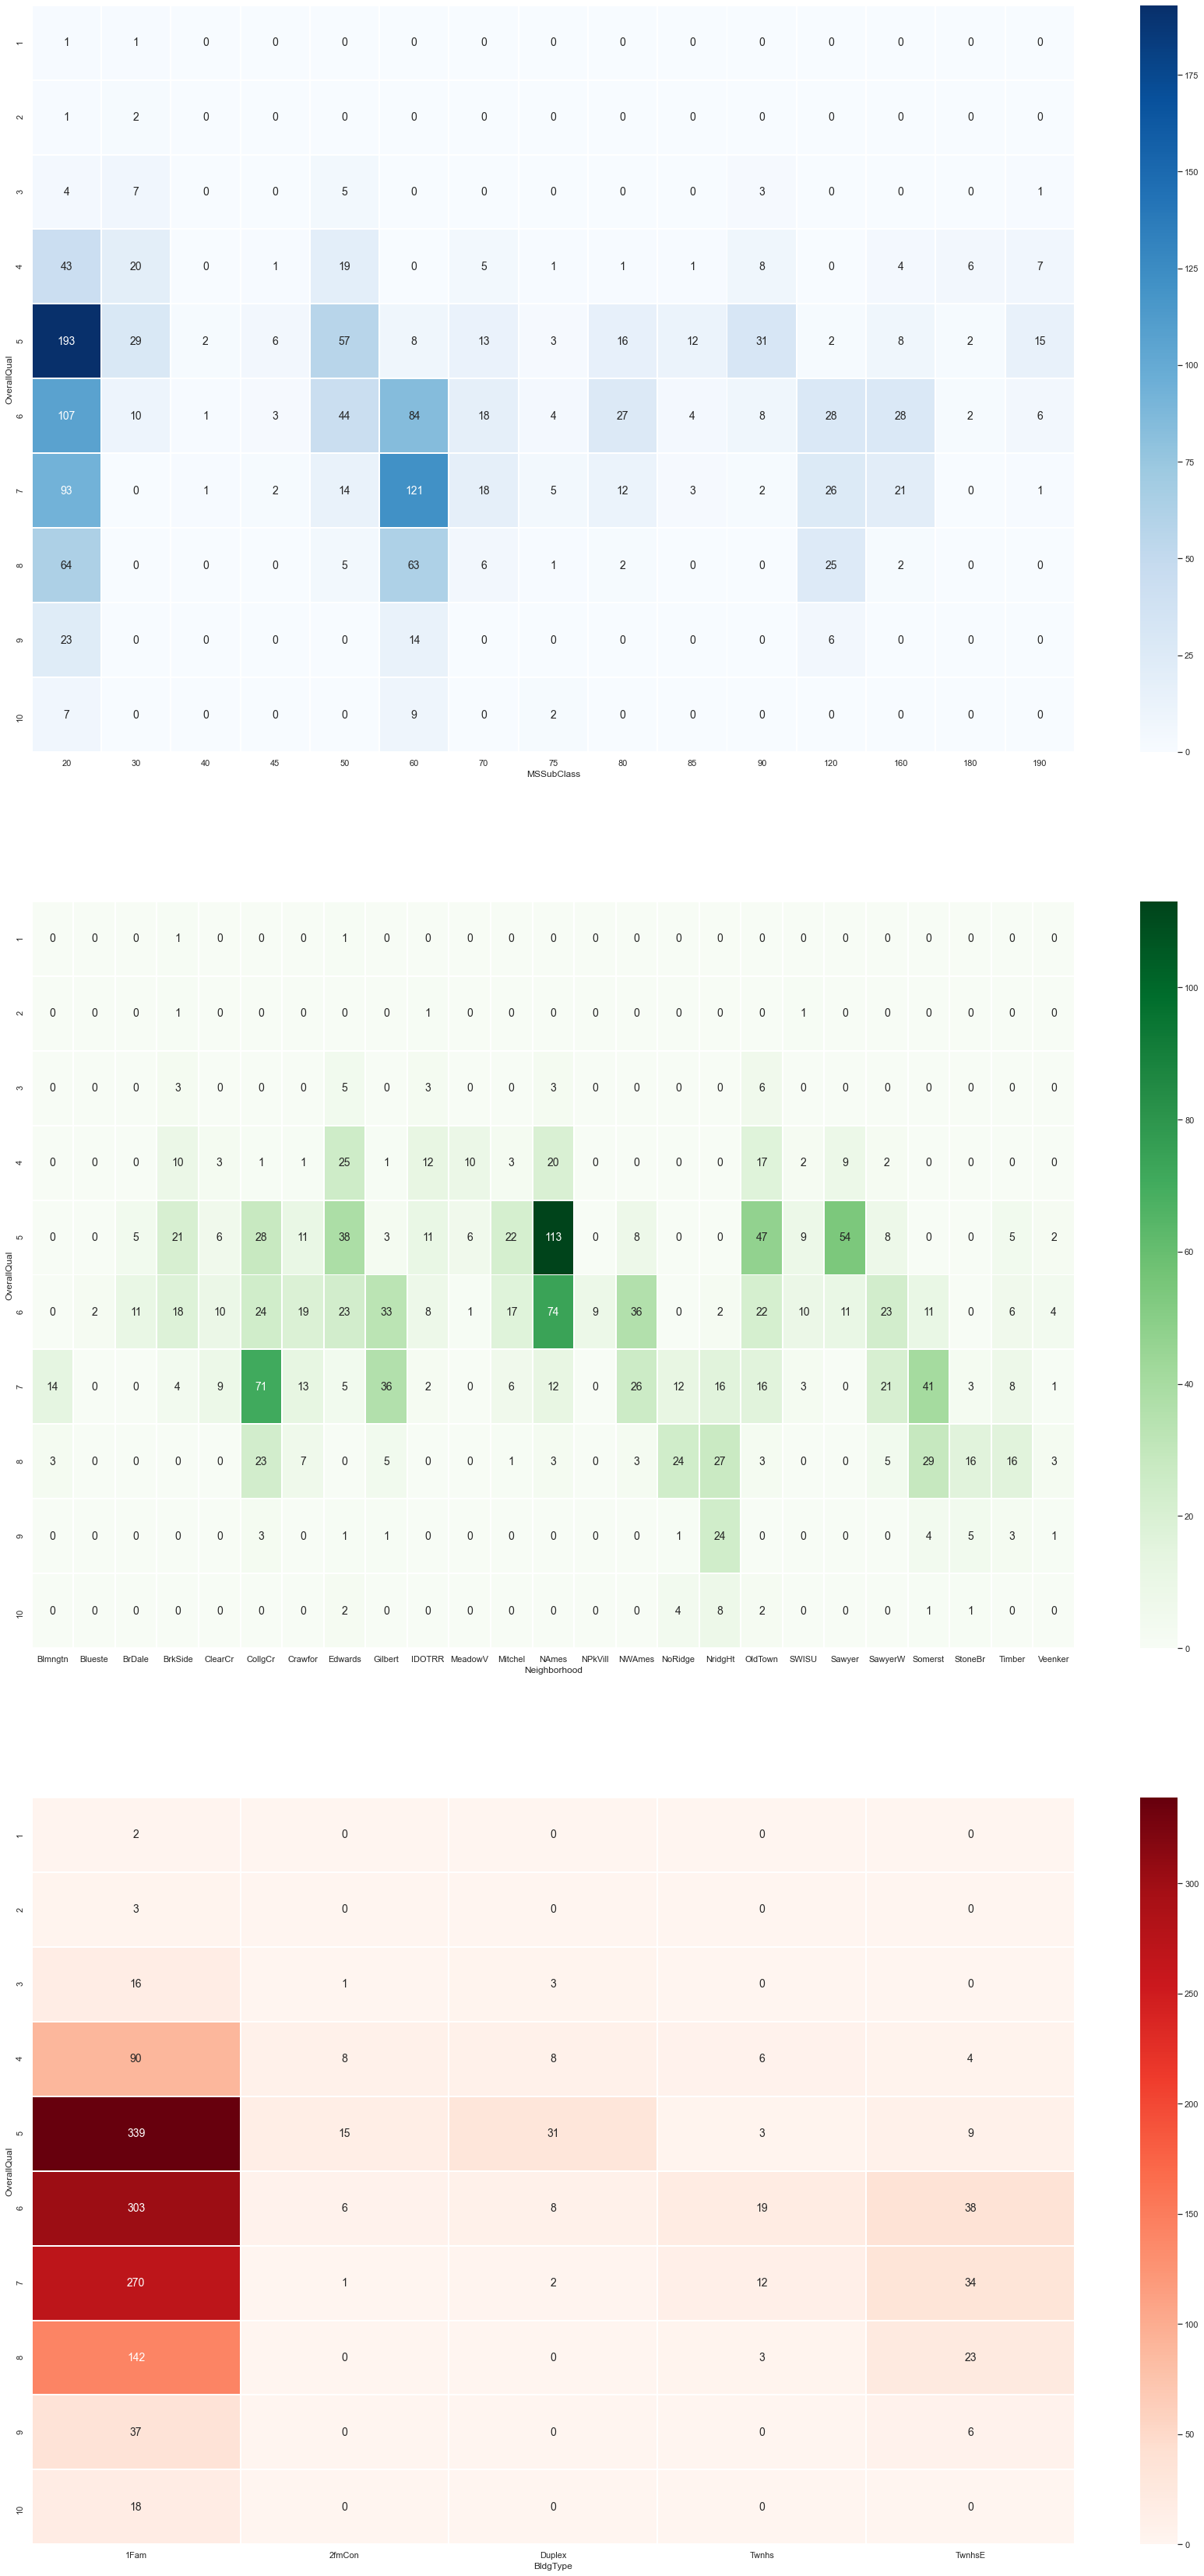

In [25]:
f, axes = plt.subplots(3, 1, figsize=(30, 60))

sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(),
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "Blues", ax = axes[0])
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(),
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "Greens", ax = axes[1])
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(),
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "Reds", ax = axes[2])

### d) Draw boxplots of “SalePrice” against each of these categorical variables. Discuss with your friends and find out if you see any pattern in these boxplots. Which of these variables has the strongest relationship with “SalePrice”?

In [15]:
housedata = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual', 'SalePrice']])
housedata.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

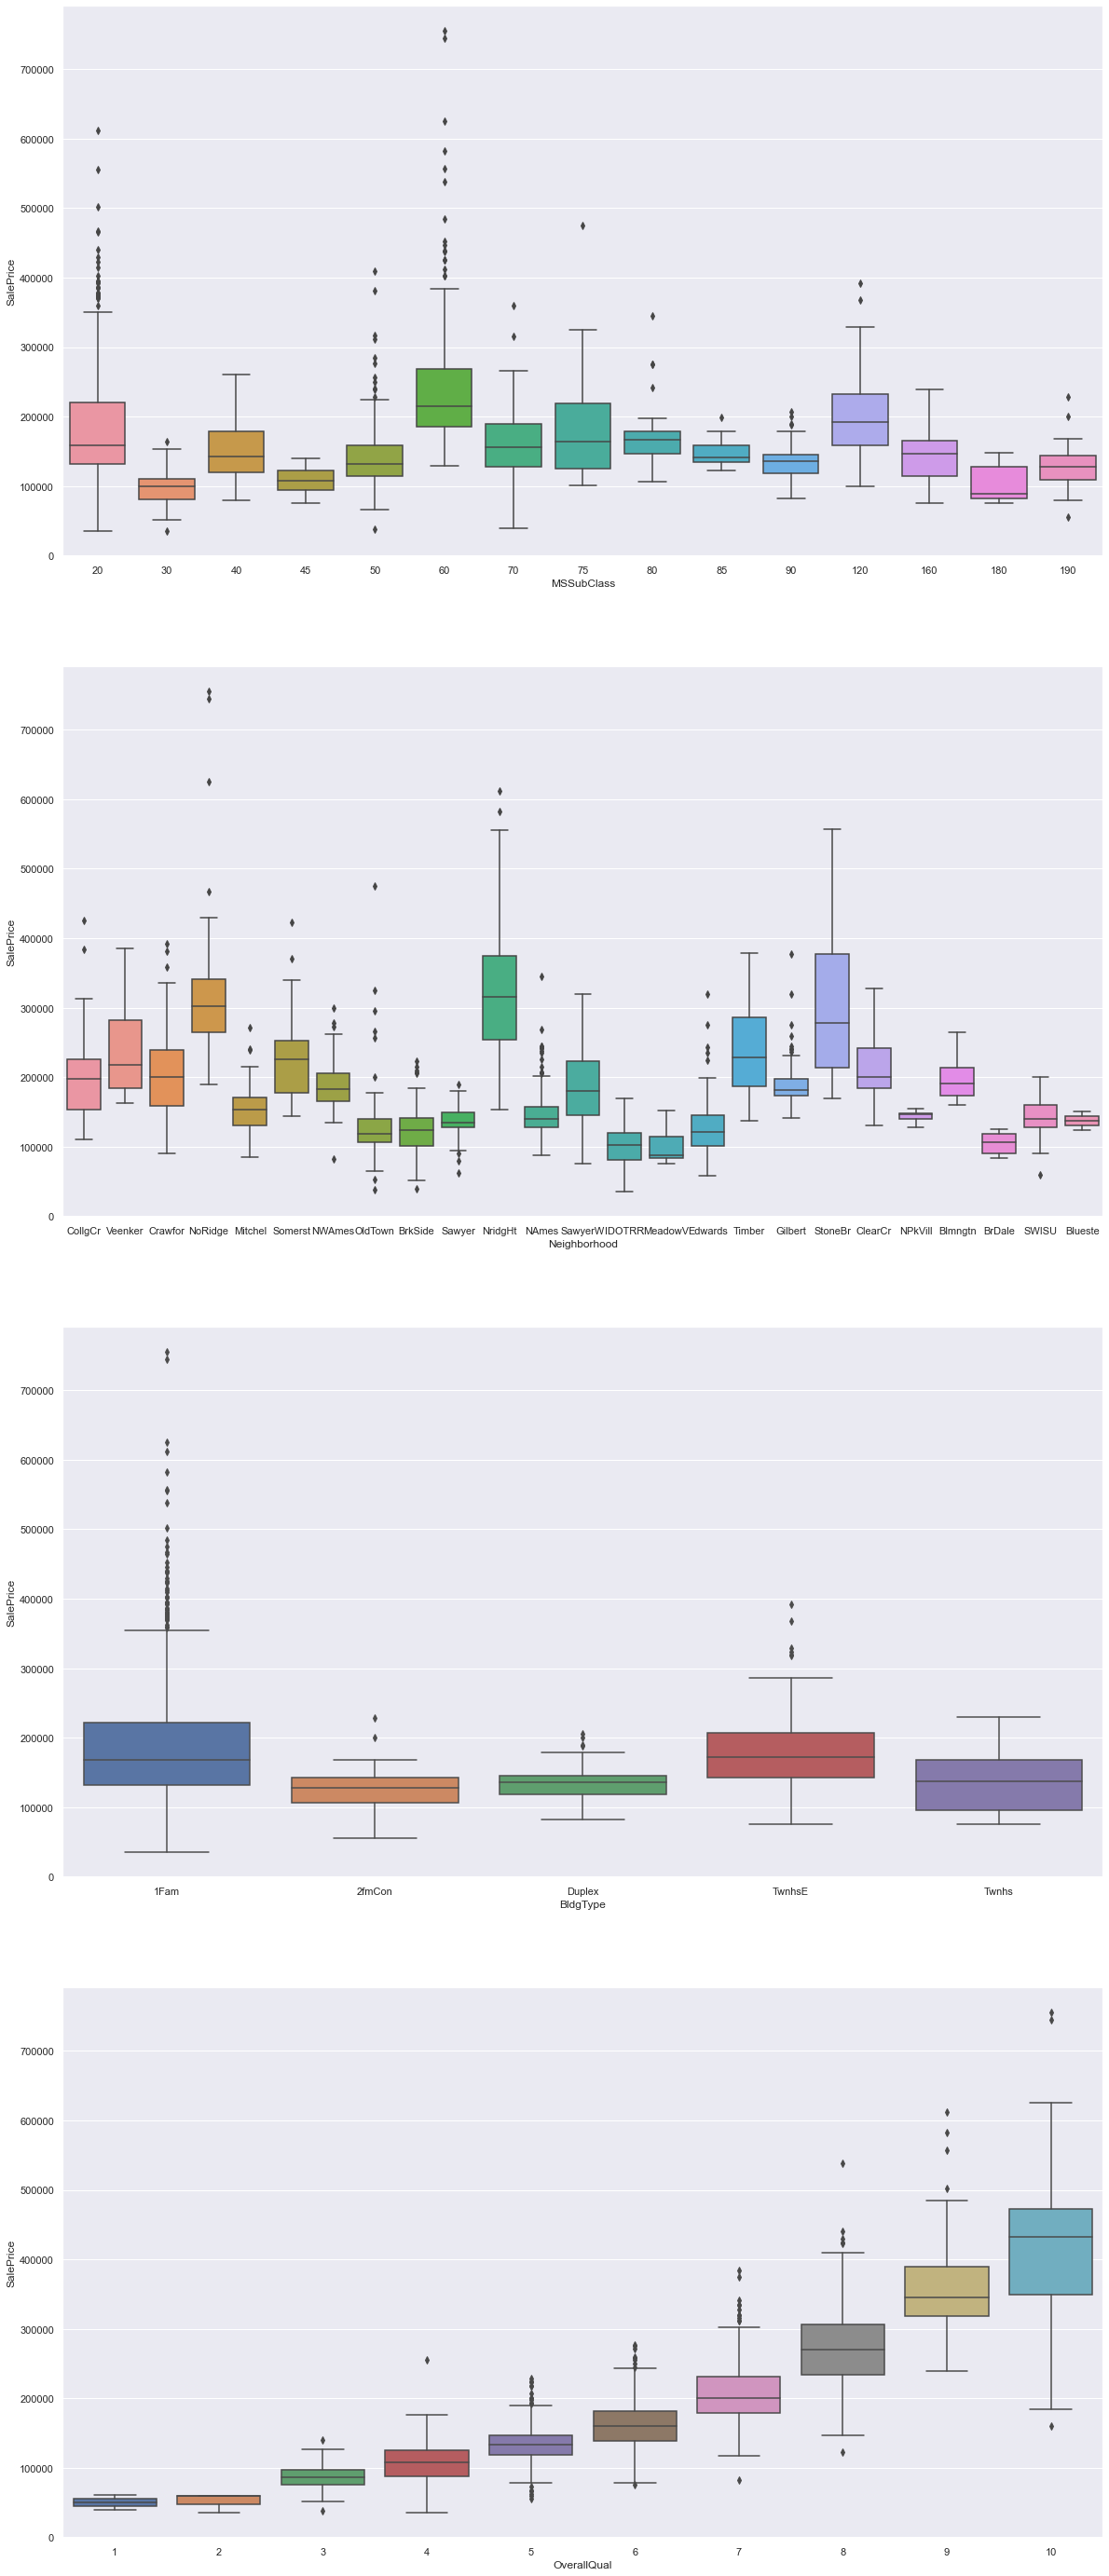

In [26]:
f, axes = plt.subplots(4,1, figsize=[20,50])

sb.boxplot(data=housedata, x='MSSubClass', y='SalePrice', ax = axes[0])
sb.boxplot(data=housedata, x='Neighborhood', y='SalePrice', ax = axes[1])
sb.boxplot(data=housedata, x='BldgType', y='SalePrice', ax = axes[2])
sb.boxplot(data=housedata, x='OverallQual', y='SalePrice', ax = axes[3])